### Практическое задание 7


In [1]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
# 1. Загрузить датасет WINE.
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)

In [24]:
cn = ['malic_acid', 'alcalinity_of_ash', 'flavanoids', 'nonflavanoid_phenols']
X = wine.data[cn]
Y = wine.target

In [25]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_x = scaler.fit_transform(X)

In [23]:
# 2. Подготовить выборки: обучающую 70% и тестовую 30%.
x_train, x_test, y_train, y_test = train_test_split(
    scaled_x,
    Y,
    test_size=0.3,
    stratify=Y)

['0', '1', '2']


Depth 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.48      0.95      0.63        21
           2       0.92      0.73      0.81        15

    accuracy                           0.57        54
   macro avg       0.46      0.56      0.48        54
weighted avg       0.44      0.57      0.47        54



Depth 2
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.79      0.71      0.75        21
           2       0.92      0.73      0.81        15

    accuracy                           0.81        54
   macro avg       0.83      0.82      0.81        54
weighted avg       0.82      0.81      0.81        54



Depth 3
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.64      0.86      0.73        21
           2       0.92      0.73      0.81   

/home/nia/.pyenv/versions/3.10.14/envs/ssau3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nia/.pyenv/versions/3.10.14/envs/ssau3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/nia/.pyenv/versions/3.10.14/envs/ssau3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

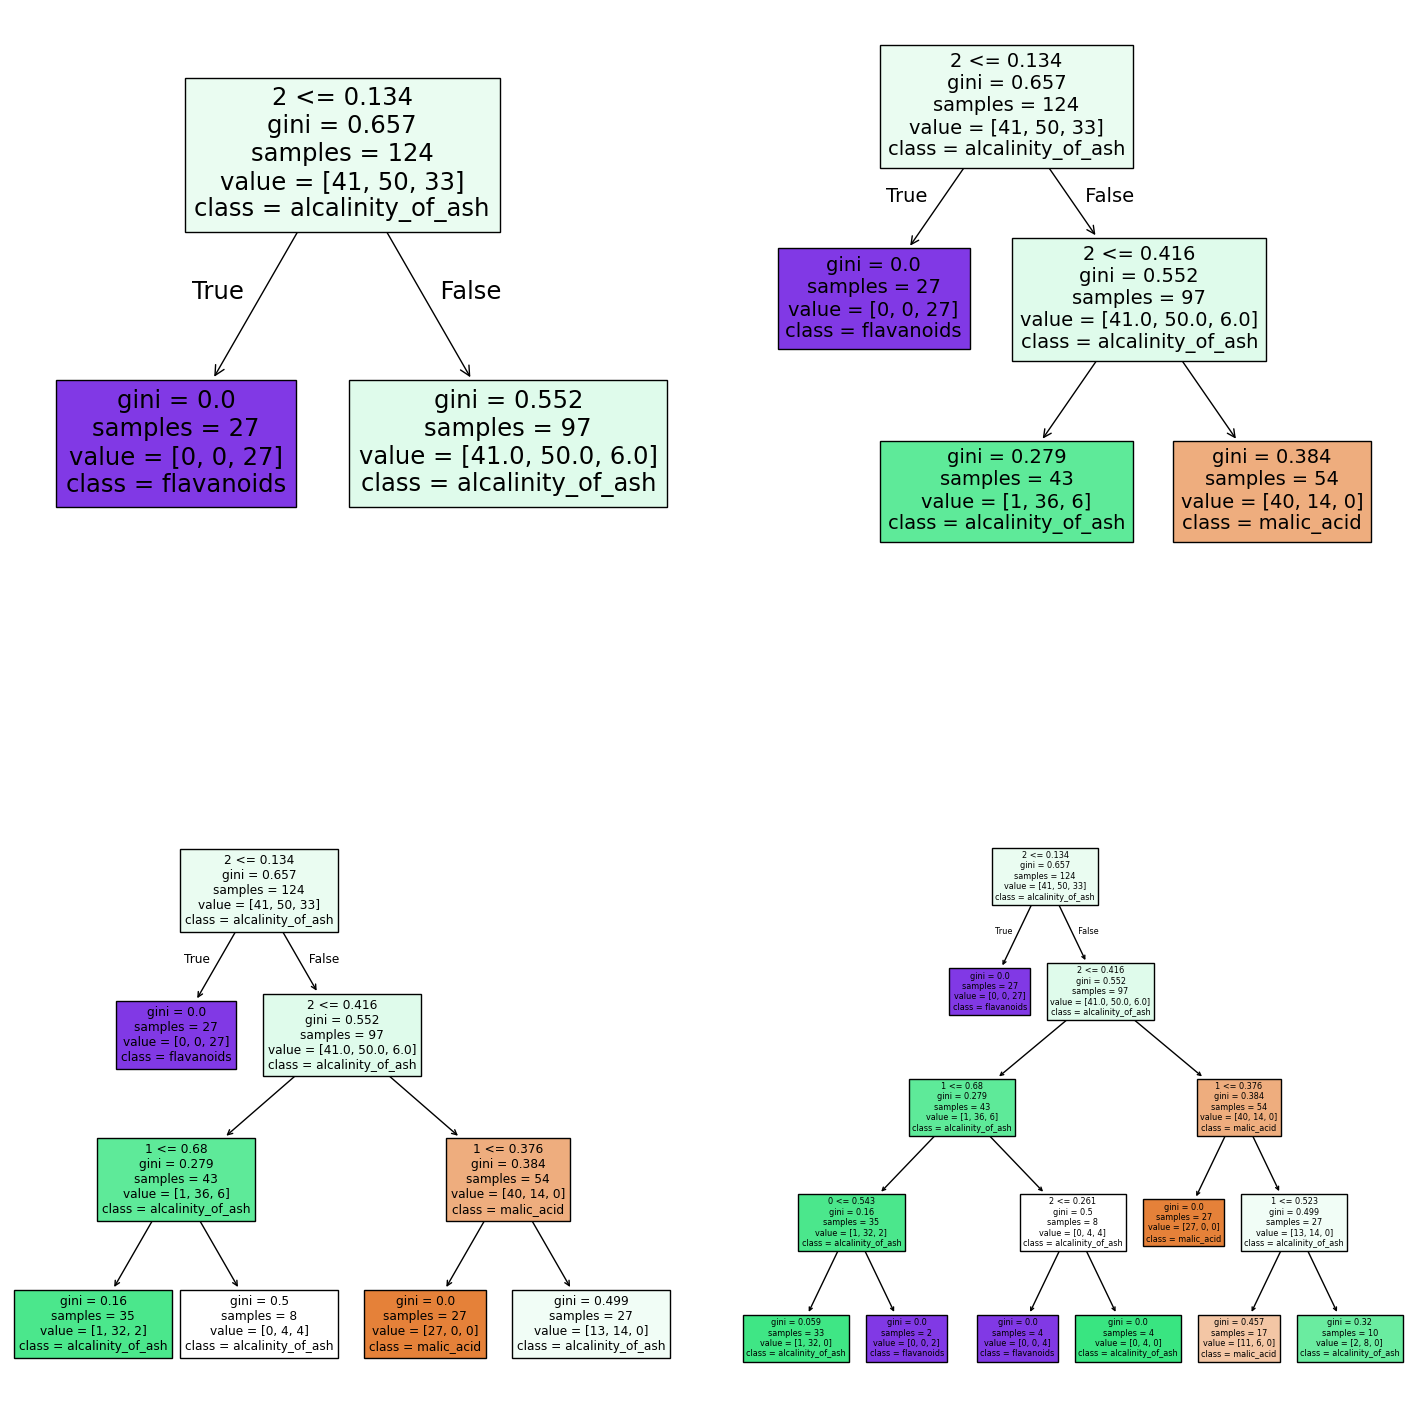

In [29]:
# 3. Построить дерево решений обеспечивающее наибольшую точность классификации.
import sklearn.tree as tree
from sklearn.metrics import accuracy_score, classification_report
tree.DecisionTreeClassifier()

pic = 1
plt.figure(figsize=(18, 18))

for dep in range(1, 5):
    ax = plt.subplot(2, 2, pic)
    clf = tree.DecisionTreeClassifier(
        max_depth=dep,  criterion='gini', random_state=12345)
    clf.fit(x_train, y_train)
    clf_pred = clf.predict(x_test)
    print()
    print(f"Depth {dep}")
    print(classification_report(y_test, clf_pred))
    tree.plot_tree(
        clf,
        feature_names=list(map(str, set(y_train))),
        class_names=cn,
        filled=True)
    print()
    pic += 1

plt.subplots_adjust(wspace=0.1, hspace=0.4)

In [95]:
# 3. Построить дерево решений обеспечивающее наибольшую точность классификации.
dec_clf = tree.DecisionTreeClassifier(
    max_depth=2,
    criterion='gini',
    random_state=12345
)
dec_clf.fit(x_train, y_train)
y_pred = dec_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.79      0.71      0.75        21
           2       0.92      0.73      0.81        15

    accuracy                           0.81        54
   macro avg       0.83      0.82      0.81        54
weighted avg       0.82      0.81      0.81        54



In [80]:
# 4. Построить случайный лес наименьшей высоты обеспечивающий наибольшую точность классификации.
from sklearn.ensemble import RandomForestClassifier
rfc_man_min_clf = RandomForestClassifier(
    n_estimators=30, max_depth=2, random_state=12345)
rfc_man_min_clf.fit(x_train, y_train)
y_pred = rfc_man_min_clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.81      0.81      0.81        21
           2       0.80      1.00      0.89        12

    accuracy                           0.85        54
   macro avg       0.85      0.87      0.86        54
weighted avg       0.86      0.85      0.85        54



In [90]:
# 5. Построить оптимальный случайный лес наименьшей высоты и с минимальным количеством деревьев обеспечивающий наибольшую точность классификации.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
num_trees = list(range(2, 50))
depth = list(range(2, x_test.shape[1]))
rnd_state = list(range(1, 50))
param_grid = dict(n_estimators=num_trees,
                  max_depth=depth, random_state=rnd_state)
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy',
                    return_train_score=False, verbose=3)
grid_search = grid.fit(x_train, y_train)

Fitting 5 folds for each of 4704 candidates, totalling 23520 fits
[CV 1/5] END max_depth=2, n_estimators=2, random_state=1;, score=0.760 total time=   0.0s
[CV 2/5] END max_depth=2, n_estimators=2, random_state=1;, score=0.840 total time=   0.0s
[CV 3/5] END max_depth=2, n_estimators=2, random_state=1;, score=0.720 total time=   0.0s
[CV 4/5] END max_depth=2, n_estimators=2, random_state=1;, score=0.720 total time=   0.0s
[CV 5/5] END max_depth=2, n_estimators=2, random_state=1;, score=0.708 total time=   0.0s
[CV 1/5] END max_depth=2, n_estimators=2, random_state=2;, score=0.720 total time=   0.0s
[CV 2/5] END max_depth=2, n_estimators=2, random_state=2;, score=0.760 total time=   0.0s
[CV 3/5] END max_depth=2, n_estimators=2, random_state=2;, score=0.720 total time=   0.0s
[CV 4/5] END max_depth=2, n_estimators=2, random_state=2;, score=0.760 total time=   0.0s
[CV 5/5] END max_depth=2, n_estimators=2, random_state=2;, score=0.750 total time=   0.0s
[CV 1/5] END max_depth=2, n_estima

/home/nia/.pyenv/versions/3.10.14/envs/ssau3.10/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [91]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ * 100
print("Accuracy is : {:.2f}%".format(accuracy))

{'max_depth': 3, 'n_estimators': 11, 'random_state': 22}
Accuracy is : 87.93%


In [92]:
opt_rfc_clf = RandomForestClassifier(**grid_search.best_params_)
opt_rfc_clf.fit(x_train, y_train)
y_pred = opt_rfc_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.76      0.76      0.76        21
           2       0.93      0.87      0.90        15

    accuracy                           0.81        54
   macro avg       0.83      0.82      0.82        54
weighted avg       0.82      0.81      0.82        54



In [105]:
from time import time


def summary(clfs, x_test, y_test):
    for par in clfs:
        name, clf, comment = par
        t1 = time()
        y_pred = clf.predict(x_test)
        t2 = time()
        print(f'----- {name} ----')
        print(f'{clf.max_depth=}')
        try:
            print(f'{clf.n_estimators=}')
        except AttributeError:
            print('clf.n_estimators=None')
        print(classification_report(y_test, y_pred))
        print(f'Predict time: {t2 - t1}')
        if comment:
            print(f'Комментарий: {comment}')
        print(f'-----        ----')


clfs = [
    (
        'Дерево решений',
        dec_clf,
        """
        Наименее точный из всех классификатор, так как
        опирается на своё собственное единственное решение
        """
    ),
    (
        'Случайный лес наименьшей высоты',
        rfc_man_min_clf,
        f"""
        При условии, что этот лес от следующего имеет меньшую глубину, наивысшая
        точность данного классификатора обусловлена наибольшим числом дереьвев
        равным {rfc_man_min_clf.n_estimators}, что даёт больше голосов в общем подсчёте голосов классификации
        """
    ),
    (
        'Оптимальный случайный лес наименьшей высоты и с минимальным количеством деревьев',
        opt_rfc_clf,
        """
        Хоть дерево и имеет меньшие метрики точности в сравнении с предыдущим,
        но оно имеет оптимальные наименьшие показатели глубины и колличества деревьев. Что позволяет
        классифицировать данные быстрее, что можно увидеть на метрике времени предсказывания
        """
    )
]
summary(clfs, x_test, y_test)

----- Дерево решений ----
clf.max_depth=2
clf.n_estimators=None
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       0.79      0.71      0.75        21
           2       0.92      0.73      0.81        15

    accuracy                           0.81        54
   macro avg       0.83      0.82      0.81        54
weighted avg       0.82      0.81      0.81        54

Predict time: 0.00029540061950683594
Комментарий: 
        Наименее точный из всех классификатор, так как
        опирается на своё собственное единственное решение
        
-----        ----
----- Случайный лес наименьшей высоты ----
clf.max_depth=2
clf.n_estimators=30
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.81      0.81      0.81        21
           2       1.00      0.80      0.89        15

    accuracy                           0.85        54
   macro avg